# Music Recommender

### Process
1. Get Spotify Dev. ID 

    a. Get credentials

    b. Use credentials to select playlist 

2.  Use data to make a dataset 

3. Extract features and enter to dataset 

4. EDA

5. Rate 1-10

6. Use Supervised Learning (Random Forest) for recomendation

7. Data analysis fo mood and genre of songs liked 

8. Run ML model 

9. Select first 3 playlists suggested 

10. Select one closest to user 

11. Filter top songs from the playlists 

12. Make new playlists

13. Add playlists to users profile 



In [82]:
#Better song recommendation system than spotify
!pip install Spotipy

In [83]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

cid ='cid' # Client ID; copy this from your app 
secret = 'sec' # Client Secret; copy this from your app
username = 'id' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'


redirect_uri='https://developer.spotify.com/dashboard/applications/1f6e50553633498ab6124e919954e688' # Paste your Redirect URI here

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [3]:
#Create a dataframe of your playlist including tracks' names and audio features
import pandas as pd

sourcePlaylistID = 'https://open.spotify.com/playlist/1Ur2nrbo5zBwTQq8hDUIqZ?si=1436577131d146a9'
sourcePlaylist = sp.user_playlist(username, sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
      
      if track is None:
        print(track)
        features.append({'danceability': 0, 'energy': 0, 'key': 0, 'loudness': 0, 'mode': 0, 'speechiness': 0, 'acousticness': 0, 'instrumentalness': 0, 'liveness': 0, 'valence': 0, 'tempo': 0, 'type': 'audio_features', 'id': '00000', 'uri': 'spotify:track:0', 'track_href': 'https://api.spotify.com/', 'analysis_url': 'https://api.spotify.com/', 'duration_ms': 0, 'time_signature': 0})
      else:
        features.append(track)
      

playlist_df = pd.DataFrame(features, index = track_names)

In [4]:
playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Sweet Thing,0.769,0.585,8,-7.891,0,0.1920,0.619,0.000000,0.114,0.673,159.940,audio_features,7LcNgZyFs7tB9z6qojXrC2,spotify:track:7LcNgZyFs7tB9z6qojXrC2,https://api.spotify.com/v1/tracks/7LcNgZyFs7tB...,https://api.spotify.com/v1/audio-analysis/7LcN...,169500,4
New Shapes,0.536,0.478,9,-9.041,0,0.1590,0.826,0.000292,0.111,0.616,134.402,audio_features,58dAnhNvncu8n86rTm0O6L,spotify:track:58dAnhNvncu8n86rTm0O6L,https://api.spotify.com/v1/tracks/58dAnhNvncu8...,https://api.spotify.com/v1/audio-analysis/58dA...,165929,1
Eyelids,0.737,0.679,3,-7.296,0,0.0488,0.385,0.000002,0.114,0.595,155.999,audio_features,02eAshORZ7I00rjCdGUnAG,spotify:track:02eAshORZ7I00rjCdGUnAG,https://api.spotify.com/v1/tracks/02eAshORZ7I0...,https://api.spotify.com/v1/audio-analysis/02eA...,227692,4
Night Shift,0.810,0.420,5,-10.980,0,0.0618,0.634,0.000107,0.256,0.592,125.941,audio_features,6nWZ5fxFy2YC46MYkLjyCT,spotify:track:6nWZ5fxFy2YC46MYkLjyCT,https://api.spotify.com/v1/tracks/6nWZ5fxFy2YC...,https://api.spotify.com/v1/audio-analysis/6nWZ...,259182,4
Pink Skies (Demo),0.565,0.566,9,-8.737,0,0.1410,0.485,0.000007,0.104,0.435,138.836,audio_features,4NeHCGpTPVCudqVpJiT7O9,spotify:track:4NeHCGpTPVCudqVpJiT7O9,https://api.spotify.com/v1/tracks/4NeHCGpTPVCu...,https://api.spotify.com/v1/audio-analysis/4NeH...,223101,4


In [5]:
playlist_df=playlist_df[["id", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]
playlist_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
Sweet Thing,7LcNgZyFs7tB9z6qojXrC2,0.619,0.769,169500,0.585,0.000000,8,0.114,-7.891,0,0.1920,159.940,0.673
New Shapes,58dAnhNvncu8n86rTm0O6L,0.826,0.536,165929,0.478,0.000292,9,0.111,-9.041,0,0.1590,134.402,0.616
Eyelids,02eAshORZ7I00rjCdGUnAG,0.385,0.737,227692,0.679,0.000002,3,0.114,-7.296,0,0.0488,155.999,0.595
Night Shift,6nWZ5fxFy2YC46MYkLjyCT,0.634,0.810,259182,0.420,0.000107,5,0.256,-10.980,0,0.0618,125.941,0.592
Pink Skies (Demo),4NeHCGpTPVCudqVpJiT7O9,0.485,0.565,223101,0.566,0.000007,9,0.104,-8.737,0,0.1410,138.836,0.435


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(track_names)
X_names_sparse.shape

(57, 284)

In [7]:
## Change the below info for each playlist manually to get better results
# Give ratings to your tracks with respect to their playlist relevances
# Rate them from 1-10, give higher ratings to those tracks which you think best chracterizes your playlist
# If you order your playlist by relevance while creating it, this step will become easier
# So now, we will deal with a classification task
import numpy as np
playlist_df['ratings']=[8,7,9,6,5,
                       3,8,4,5,6,
                       6,7,7,8,4,
                       6,4,7,8,10,
                       9,9,6,10,4,
                       7,7,9,5,8, 
                       9,7,5,3,7,
                       4,6,8,9,4,
                       10,3,9,8,8,
                       10,8,8,9,7,
                       9,8,9,8,5,
                       3,4]
playlist_df.head()
playlist_df.to_csv("Spotify_playlist_Dataset.csv")

In [8]:
playlist_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
Sweet Thing,7LcNgZyFs7tB9z6qojXrC2,0.619,0.769,169500,0.585,0.000000,8,0.114,-7.891,0,0.1920,159.940,0.673,8
New Shapes,58dAnhNvncu8n86rTm0O6L,0.826,0.536,165929,0.478,0.000292,9,0.111,-9.041,0,0.1590,134.402,0.616,7
Eyelids,02eAshORZ7I00rjCdGUnAG,0.385,0.737,227692,0.679,0.000002,3,0.114,-7.296,0,0.0488,155.999,0.595,9
Night Shift,6nWZ5fxFy2YC46MYkLjyCT,0.634,0.810,259182,0.420,0.000107,5,0.256,-10.980,0,0.0618,125.941,0.592,6
Pink Skies (Demo),4NeHCGpTPVCudqVpJiT7O9,0.485,0.565,223101,0.566,0.000007,9,0.104,-8.737,0,0.1410,138.836,0.435,5


In [9]:
# Analyze feature importances
from sklearn.ensemble._forest import RandomForestRegressor, RandomForestClassifier

X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=12) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))


Feature ranking:
1. acousticness 0.117307 
2. danceability 0.112947 
3. duration_ms 0.108412 
4. energy 0.105846 
5. instrumentalness 0.100459 
6. key 0.091960 
7. liveness 0.088161 
8. loudness 0.082903 
9. mode 0.072326 
10. speechiness 0.050064 
11. tempo 0.049982 
12. valence 0.019634 


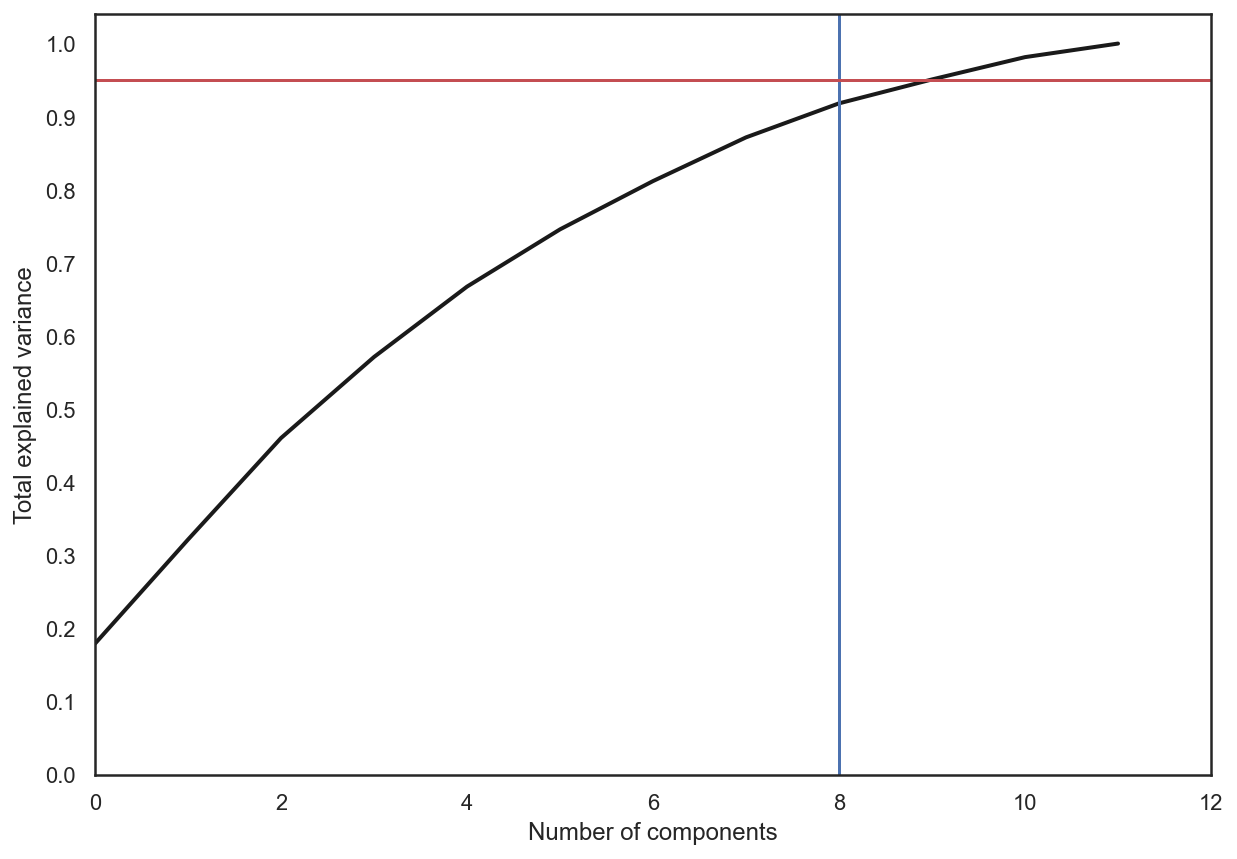

In [10]:
# Apply pca to the scaled train set first

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();

In [11]:
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)

In [13]:
# You may want to check the results of TSNE also
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_scaled)

/Users/amenti_kenea/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/amenti_kenea/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [14]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse])) # Check with X_tsne + X_names_sparse also

In [15]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [16]:
# Decision Trees First
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=skf, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_last, y_train)
tree_grid.best_estimator_, tree_grid.best_score_


Fitting 5 folds for each of 150 candidates, totalling 750 fits


(DecisionTreeClassifier(max_depth=8, max_features=11), 0.24545454545454545)

In [17]:
# Random Forests second

parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv1.fit(X_train_last, y_train)
gcv1.best_estimator_, gcv1.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


(RandomForestClassifier(max_depth=3, max_features=10, n_jobs=-1, oob_score=True,
                        random_state=42),
 0.22575757575757577)

In [18]:
# kNN third
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_last, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'n_neighbors': 8}, 0.17727272727272728)


PCA + Decision Trees seems to perform better 

In [19]:
# Now build your test set;
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

rec_tracks = []
for i in playlist_df['id'].values.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=int(len(playlist_df)/2))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
3iH29NcCxYgI5shlkZrUoB,0.677,0.714,11,-5.637,1,0.0287,0.1620,0.000000,0.0717,0.355,94.956,audio_features,3iH29NcCxYgI5shlkZrUoB,spotify:track:3iH29NcCxYgI5shlkZrUoB,https://api.spotify.com/v1/tracks/3iH29NcCxYgI...,https://api.spotify.com/v1/audio-analysis/3iH2...,136568,4
1N8moY6H0eThviK71VhTzY,0.840,0.811,11,-3.243,0,0.0498,0.2130,0.000000,0.2580,0.710,145.025,audio_features,1N8moY6H0eThviK71VhTzY,spotify:track:1N8moY6H0eThviK71VhTzY,https://api.spotify.com/v1/tracks/1N8moY6H0eTh...,https://api.spotify.com/v1/audio-analysis/1N8m...,190345,4
4z4OzUPgnHa4PYg9L6qqEs,0.738,0.541,11,-4.985,0,0.2140,0.2950,0.000023,0.1260,0.394,90.087,audio_features,4z4OzUPgnHa4PYg9L6qqEs,spotify:track:4z4OzUPgnHa4PYg9L6qqEs,https://api.spotify.com/v1/tracks/4z4OzUPgnHa4...,https://api.spotify.com/v1/audio-analysis/4z4O...,178887,4
1MQ65x3A2ZaUmP6wAmTJR5,0.654,0.636,5,-8.337,0,0.0373,0.0144,0.000728,0.1210,0.301,155.025,audio_features,1MQ65x3A2ZaUmP6wAmTJR5,spotify:track:1MQ65x3A2ZaUmP6wAmTJR5,https://api.spotify.com/v1/tracks/1MQ65x3A2ZaU...,https://api.spotify.com/v1/audio-analysis/1MQ6...,150047,4
4ffiKZuYJPRpLaeVHXMVyM,0.791,0.684,2,-4.650,1,0.2610,0.2270,0.000000,0.1110,0.690,150.079,audio_features,4ffiKZuYJPRpLaeVHXMVyM,spotify:track:4ffiKZuYJPRpLaeVHXMVyM,https://api.spotify.com/v1/tracks/4ffiKZuYJPRp...,https://api.spotify.com/v1/audio-analysis/4ffi...,153600,4


In [20]:
rec_playlist_df.count()

danceability        1596
energy              1596
key                 1596
loudness            1596
mode                1596
speechiness         1596
acousticness        1596
instrumentalness    1596
liveness            1596
valence             1596
tempo               1596
type                1596
id                  1596
uri                 1596
track_href          1596
analysis_url        1596
duration_ms         1596
time_signature      1596
dtype: int64

In [21]:
X_test_names = v.transform(rec_track_names)

In [22]:
X_test_names

<1596x284 sparse matrix of type '<class 'numpy.float64'>'
	with 988 stored elements in Compressed Sparse Row format>

In [23]:
rec_playlist_df=rec_playlist_df[["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [24]:
rec_playlist_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
3iH29NcCxYgI5shlkZrUoB,0.1620,0.677,136568,0.714,0.000000,11,0.0717,-5.637,1,0.0287,94.956,0.355
1N8moY6H0eThviK71VhTzY,0.2130,0.840,190345,0.811,0.000000,11,0.2580,-3.243,0,0.0498,145.025,0.710
4z4OzUPgnHa4PYg9L6qqEs,0.2950,0.738,178887,0.541,0.000023,11,0.1260,-4.985,0,0.2140,90.087,0.394
1MQ65x3A2ZaUmP6wAmTJR5,0.0144,0.654,150047,0.636,0.000728,5,0.1210,-8.337,0,0.0373,155.025,0.301
4ffiKZuYJPRpLaeVHXMVyM,0.2270,0.791,153600,0.684,0.000000,2,0.1110,-4.650,1,0.2610,150.079,0.690


In [25]:
# Make predictions
tree_grid.best_estimator_.fit(X_train_last, y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
rec_playlist_df_pca = pca1.transform(rec_playlist_df_scaled)
X_test_last = csr_matrix(hstack([rec_playlist_df_pca, X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

In [26]:
y_pred_class

array([8, 8, 8, ..., 8, 8, 3])

In [27]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
rec_playlist_df = rec_playlist_df.reset_index()

# Pick the top ranking tracks to add your new playlist 9, 10 will work
## Here lies the ISSUE!!!! --- Only ones with less than or equal to 8 exist, soo... chance >=9 to 8/7
#recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=8]['index'].values.tolist()
# No ratings of 9 or 10 this case try adding 8's only
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']==8]['index'].values.tolist()

In [31]:
# Check what is about to happen :)
len(rec_tracks), rec_playlist_df.shape, len(recs_to_add)

(1596, (1596, 14), 1555)

In [71]:
recs_to_add_cut2 = np.reshape(recs_to_add, (311,5))

In [57]:


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

cid ='id' # Client ID; copy this from your app 
secret = 'sec' # Client Secret; copy this from your app
username = 'name' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'


redirect_uri='https://developer.spotify.com/dashboard/applications/1f6e50553633498ab6124e919954e688' # Paste your Redirect URI here


token = util.prompt_for_user_token(username,scope,client_id=cid,client_secret=secret,redirect_uri='https://developer.spotify.com/dashboard/applications/1f6e50553633498ab6124e919954e688' ) 
sp = spotipy.Spotify(auth=token)

In [69]:
playlist_name = "ML Generated Music Experiment"    
playlist_recs = sp.user_playlist_create(username, name=playlist_name)

In [72]:
# Add tracks to the new playlist
for i in recs_to_add_cut2:
    sp.user_playlist_add_tracks(username, playlist_recs['id'], i);

In [79]:
# Trying to make it shorter for consumption (50)
recs_to_add_cut100 = recs_to_add[0:100]
len(recs_to_add_cut100)

100

In [80]:
recs_to_add_cut100 = np.reshape(recs_to_add_cut100, (10,10))

In [76]:
playlist_name = "ML Generated Music Experiment, Part II"    
playlist_recs = sp.user_playlist_create(username, name=playlist_name)

In [81]:
# Add tracks to the new playlist
for i in recs_to_add_cut100:
    sp.user_playlist_add_tracks(username, playlist_recs['id'], i);